<a href="https://colab.research.google.com/github/AmanPriyanshu/Visuals-for-DataScience/blob/master/Visualisaing_classification_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import random
import tensorflow as tf

## CREATING A DATASET:

In [16]:
x = np.array([3 * np.random.random_sample((3,)) - 3 for _ in range(2500)] + [3 * np.random.random_sample((3,)) + 3 for _ in range(2500)] + [6 * np.random.random_sample((3,)) - 2.75 for _ in range(2500)] + [-5 * np.random.random_sample((3,)) - 2.8 for _ in range(2500)])
y = np.array([0 for _ in range(2500)] + [1 for _ in range(2500)] + [2 for _ in range(2500)] + [3 for _ in range(2500)])

In [17]:
print(x.shape, y.shape)

(10000, 3) (10000,)


## SHUFFLING:

In [18]:
indexes = np.arange(x.shape[0])
np.random.shuffle(indexes)

x = x[indexes]
y = y[indexes]

## CREATING A BASIC MODEL:

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [21]:
model.fit(x, y, epochs=25, validation_split=0.2)

Epoch 1/25
250/250 [==============================] - 0s 2ms/step - loss: 1.4426 - acc: 0.3330 - val_loss: 1.2281 - val_acc: 0.3325
Epoch 2/25
250/250 [==============================] - 0s 1ms/step - loss: 1.0841 - acc: 0.5440 - val_loss: 0.9505 - val_acc: 0.6535
Epoch 3/25
250/250 [==============================] - 0s 1ms/step - loss: 0.8832 - acc: 0.7785 - val_loss: 0.7989 - val_acc: 0.8575
Epoch 4/25
250/250 [==============================] - 0s 1ms/step - loss: 0.7478 - acc: 0.8391 - val_loss: 0.6743 - val_acc: 0.8645
Epoch 5/25
250/250 [==============================] - 0s 1ms/step - loss: 0.6328 - acc: 0.8619 - val_loss: 0.5657 - val_acc: 0.8945
Epoch 6/25
250/250 [==============================] - 0s 1ms/step - loss: 0.5332 - acc: 0.8844 - val_loss: 0.4727 - val_acc: 0.9125
Epoch 7/25
250/250 [==============================] - 0s 1ms/step - loss: 0.4484 - acc: 0.9051 - val_loss: 0.3964 - val_acc: 0.9285
Epoch 8/25
250/250 [==============================] - 0s 1ms/step - loss: 0.

## WELL PRETTY EFFICIENT:

### Let's take a look at it

In [22]:
classes = 4

In [23]:
y_pred = model.predict(x)
y_pred = np.array([np.argmax(i) for i in y_pred])

In [24]:
groups = {}
for i in range(classes):
  groups.update({i:[]})

for i,j in zip(y, y_pred):
    groups[i].append(j)
    
p_error = {}
for i in range(classes):
  p_error.update({i:[]})

for key, item in groups.items():
    for i in range(4):
        p_error[key].append(item.count(i))
    total = sum(p_error[key])
    p_error[key] = [round(i/total, 5) for i in p_error[key]]

_ = [print(key,':',item) for key, item in p_error.items()]

0 : [0.9424, 0.0, 0.0576, 0.0]
1 : [0.0, 1.0, 0.0, 0.0]
2 : [0.1296, 0.0024, 0.868, 0.0]
3 : [0.0012, 0.0, 0.0, 0.9988]


### Directed Error Maps

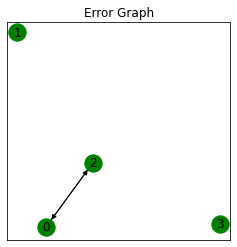

In [25]:
import networkx as nx 
from matplotlib import pyplot as plt

def error_graph(p_error):
    
    G = nx.DiGraph() 
    for i in range(classes):
        G.add_node(i)
    
    for key, item in p_error.items():
        for i,x in enumerate(item):
            x = round(x, 3)
            if i!=key and x>0.01:
                G.add_edge(key, i, weight=x)
    
    plt.figure(figsize =(4, 4))
    plt.title("Error Graph")
    nx.draw_networkx(G, node_color ='green')
    
error_graph(p_error)